# Midterm (MACS 30100), February 5, 2018
### Alexander Tyan
You will have an hour and thirty minutes to take this exam.
1. Put your name in the space provided above (without the brackets).
2. Download this notebook and accompanying data `LenderDataLong.dta`.
3. The class will disconnect their wi-fi and begin taking the exam.
4. The exam is open computer, closed internet, open note.
5. Once you are done, you will signal to a TA or instructor to come over and monitor while you reconnect to the internet and upload your edited notebook to Canvas.

Remember that you must clearly indicate your answers to all questions below. We will give partial credit for partially correct answers. The midterm is worth 20 points (2 problem sets).

## The data
This two exercises of this midterm and all their respective subparts will use the `LenderData.csv` dataset, which contains observations of characteristics on short-term, high interest rate, lender information. You are not to use this data outside of this class. It is a jittered and randomized version of a dataset used in a published research paper.

Each observation contains characteristics of a particular lender location Read it into Python using the `pandas.read_csv()` command. The variables are the following:

* `avgrate`: average annualized interest rate of all loans in percentage points (235 = two hundred and thirty five percent)
* `numstores`: number of other stores owned by the same owner (measure of size)
* `defrate`: default rate on loans from that store during 2010
* `pdrad3`: number of payday lenders within a three-mile radius of the store (measure of competition)
* `pnrad3`: number of pawn lenders within a three-mile radius of the store (measure of competition)
* `totrad3`: total number of other lenders within a three-mile radius of the store (measure of competition)
* `unrt_zip`: unemployment rate in the zip code of the store
* `medtotinc2010`: median total household income in the zip code of the store
* `edbachplus_zip`: average education level in years of schooling of heads of household in the zip code of the store
* `pop_zip`: population in zip code of the store
* `mdage_zip`: median age (in years) in zip code of the store
* `pctblk2_zip`: percent of the population that is black in the zip code of the store in percentage points (2.2=two point two percent)

In [172]:
import pandas as pd
df = pd.read_csv("LenderData.csv")
avgrate = df["avgrate"]

## 1. Using the distributions of interest rates and median income (10 points)

1A) [2 points] Create a plot of the histogram of high interest rate lenders interest rates `avgrate`. Use 30 bins. Make sure to label your axes and give the figure a title. If you had to group lenders into $N$ categories, how many categories would you choose based on the interest rate data? That is, how many groupings to you see in these data?

<IPython.core.display.Javascript object>


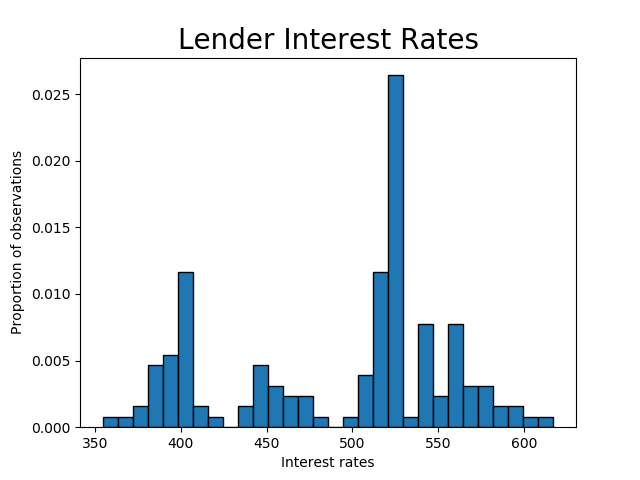

1A: I would group lender into 3 categories as we see roughly a trimodal distribution.


In [173]:
import matplotlib.pyplot as plt
%matplotlib notebook
count, bins, ignored = plt.hist(avgrate, 30, edgecolor='black', normed=True)
plt.title('Lender Interest Rates', fontsize=20)
plt.xlabel('Interest rates')
plt.ylabel('Proportion of observations')
print("1A:", "I would group lender into 3 categories as we see roughly a trimodal distribution.")

1B) [1 point] Create a plot of the histogram of median total household income `medtotinc2010`. Use 30 bins. Make sure to label your axes and give the figure a title.

<IPython.core.display.Javascript object>


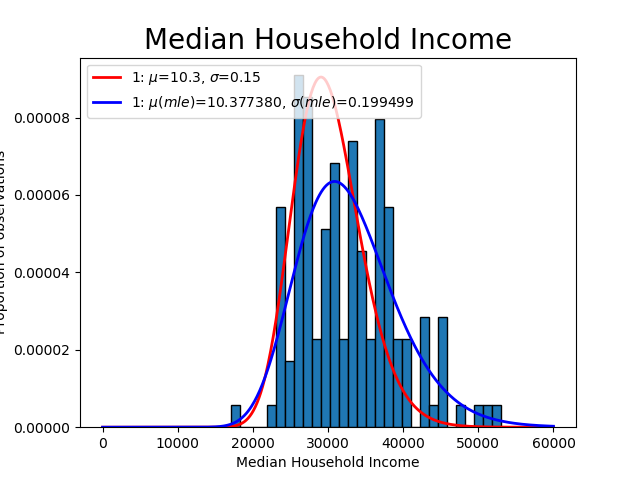

Text(0,0.5,'Proportion of observations')

In [174]:
medtotinc2010 = df["medtotinc2010"]
%matplotlib notebook
count, bins, ignored = plt.hist(medtotinc2010, 30, edgecolor='black', normed=True)
plt.title('Median Household Income', fontsize=20)
plt.xlabel('Median Household Income')
plt.ylabel('Proportion of observations')

1C) [5 points] Use maximum likelihood estimation to fit a lognormal distribution $LN(\mu, \sigma)$ to the median income data `medtotinc2010`. Report your estimated $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$ as well as the likelihood function value at the maximum (not the negative log likelihood). Report your estimate of the variance-covariance matrix of your maximum likelihood estimates of $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$. Report the standard error on the estimate for $\hat{\mu}_{mle}$.

In [175]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integrate

In [176]:
def lognormal_pdf(xvals, mu, sigma):
    """
    Generates a vector of values from a lognormal distribution.
    Inputs:
        xvals: Numpy array, vector of x-values
        mu: Integer mean
        sigma: Integer standard deviation
    Returns:
        pdf_vals: Numpy array, vector of y-values, i.e. pdf-values.
    """
    pdf_vals = ( 1 / 
           (xvals * sigma * np.sqrt(2 * np.pi))) * np.exp( (- (np.log(xvals) - mu) ** 2) / (2 * (sigma ** 2)))
    return pdf_vals

In [177]:
# Plot the lognormal PDF:
dist_pts = np.linspace(0.00000001, 60000, 500)
mu_1 = 10.3
sig_1 = .15

plt.plot(dist_pts, lognormal_pdf(dist_pts, mu_1, sig_1),
         linewidth=2, color='r', label='1: $\mu$={}, $\sigma$={}'.format(mu_1, sig_1))
plt.legend(loc='upper left')

In [178]:
def log_lik_lognormal(xvals, mu, sigma):
    """
    Log likelihood function for a lognormal disgribution.
    Inputs:
        xvals: Numpy array, our data
        mu: float, mean
        sigma: float, s.d.
    Returns:
        Log likelihood function value
    """
    pdf_vals = lognormal_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [179]:
def crit(params, *args):
    """
    Criterion function for minimization.
    Inputs:
        params: tuple of mean and sd
        *args: observation values
    Returns:
        negative value of log likelihood function
    """
    mu, sigma = params
    xvals, = args
    log_lik_val = log_lik_lognormal(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [180]:
mu_init = 10.3
sig_init = .15
params_init = np.array([mu_init, sig_init])
mle_args = (medtotinc2010, )

# Estimate the parameters of the lognormal distribution by maximum likelihood:
results = opt.minimize(crit, params_init, args=(mle_args), method='L-BFGS-B',
                       bounds=((1e-10, None), (1e-10, None)))
mu_MLE, sig_MLE = results.x
print("1C: ")
print('mu_MLE =', mu_MLE, ' sig_MLE=', sig_MLE)
print('Log-likelihood function value for mean={} and sd={}:'.format(mu_MLE, sig_MLE), log_lik_lognormal(medtotinc2010, mu_MLE, sig_MLE))

1C: 
mu_MLE = 10.3773801718  sig_MLE= 0.199499414719
Log-likelihood function value for mean=10.377380171767383 and sd=0.1994994147190712: -1497.103008886256


1D) [2 points] Plot the predicted distribution from your maximum likelihood estimates $\hat{\mu}_{mle}$ and $\hat{\sigma}_{mle}$ against the histogram of the data.

In [181]:
print("1D (see histogram earlier): ")
plt.plot(dist_pts, lognormal_pdf(dist_pts, mu_MLE, sig_MLE),
         linewidth=2, color='b', label='1: $\mu(mle)$={:2f}, $\sigma(mle)$={:2f}'.format(mu_MLE, sig_MLE))
plt.legend(loc='upper left')

1D (see histogram earlier): 


## 2. Determinants of lender interest rates (10 points)

2A) [3 points] Assume a simple regression model of four factors that influence the interest rates that a lender charges, namely, number of stores, default rate in the area, unemployment rate in the area, and median household income in the area.

$$ avgrate_i = \beta_0 + \beta_1 numstores_i + \beta_2 defrate_i + \beta_3 unrt_zip_i + \beta_4 medtotinc2010_i + u_i $$

Estimate this model by OLS using the `statsmodels.api` package. Don't forget to include a constant. Print your results summary. Which variables are significant at the 5-percent level? How would you interpret in words the estimated coefficient on `numstores`?

In [182]:
# Run OLS regression:
import statsmodels.api as sm
df["constant"] = 1
ols_regression = sm.OLS(endog=df["avgrate"], exog=df[["constant", "numstores", "defrate", 
                                                           "unrt_zip", "medtotinc2010"]], 
                        missing="drop")
results = ols_regression.fit()
print("2A: ")
print(results.summary())

2A: 
                            OLS Regression Results                            
Dep. Variable:                avgrate   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.375
Date:                Mon, 05 Feb 2018   Prob (F-statistic):            0.00229
Time:                        12:48:03   Log-Likelihood:                -812.28
No. Observations:                 147   AIC:                             1635.
Df Residuals:                     142   BIC:                             1650.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
constant        453.4117     51.263      

Variables signifcant at 0.05 level:

"numstores", with coefficient -2.6278 at p-value 0.000

(Also, "constant", with coefficient 453.4117 at p-value 0.000)

Interpretation of numstores coefficient:

"With an increase of owning an additional single store, we predict a 2.6 percent DECREASE of average annualized interest rate of all loans."


2B) [4 points] Now assume a richer model for the determinants of lender interest rates, which includes the following measures of competition and other demographic variables.

$$ avgrate_i = \beta_0 + \beta_1 numstores_i + \beta_2 defrate_i + \beta_3 unrt_zip_i + \beta_4 medtotinc2010_i + ... $$
$$ \qquad\qquad\qquad\qquad \beta_5 totrad3_i + \beta_6 edbachplus\_zip_i + \beta_7 pop\_zip_i + \beta_8 mdage\_zip_i + \beta_9 pctblk2\_zip_i + u_i $$

Estimate this regression by OLS using the `statsmodels.api` package. In controlling for these new varaibles, do any of the originally estimated coefficients from the model in part (2A) become statistically not significant (at the 5 percent level)? Of these new coefficients ($\beta_5$ through $\beta_9$), which one(s) are the most statistically significant?

In [183]:
ols_regression_2 = sm.OLS(endog=df["avgrate"], exog=df[["constant", "numstores", "defrate", 
                                                           "unrt_zip", "medtotinc2010",
                                                       "totrad3", "edbachplus_zip", "pop_zip",
                                                       "mdage_zip", "pctblk2_zip"]], 
                        missing="drop")
results_2 = ols_regression_2.fit()
print("2B: ")
print(results_2.summary())

2B: 
                            OLS Regression Results                            
Dep. Variable:                avgrate   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2.846
Date:                Mon, 05 Feb 2018   Prob (F-statistic):            0.00419
Time:                        12:48:03   Log-Likelihood:                -808.23
No. Observations:                 147   AIC:                             1636.
Df Residuals:                     137   BIC:                             1666.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
constant         613.9741     85.491   

In controlling for these new varaibles, do any of the originally estimated coefficients from the model in part (2A) become statistically not significant (at the 5 percent level)?:

No, numstores (and constant) are still significant at p-value = 0.000

Of these new coefficients ($\beta_5$ through $\beta_9$), which one(s) are the most statistically significant?:

At p <= 0.05 level, edbachplus_zip is significant, with p-value of 0.047

2C) [3 points] Create a new binary variable called `avgrate_high` that equals 1 if `avgrate` > 490, and equals 0 otherwise. Estimate a logistic regression using the `statsmodels.api` package. Let $X\beta$ be the linear coefficients and variables from the model from part (2B).

$$ Pr(avgrate\_high=1|X\beta) = \frac{X\beta}{1 + X\beta} $$

Report the variables whose coefficients are estimated to be significant at the 5-percent level.

In [184]:
threshold = 425
df["avgrate_high"] = 0
df.loc[df["avgrate"] > threshold, "avgrate_high"] = 1

In [185]:
import seaborn as sb
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [186]:
# Check nulls:
df.isnull().sum()

avgrate           0
numstores         0
defrate           0
pdrad3            0
pnrad3            0
totrad3           0
unrt_zip          0
medtotinc2010     0
edbachplus_zip    0
pop_zip           0
mdage_zip         0
pctblk2_zip       0
constant          0
avgrate_high      0
dtype: int64

<IPython.core.display.Javascript object>


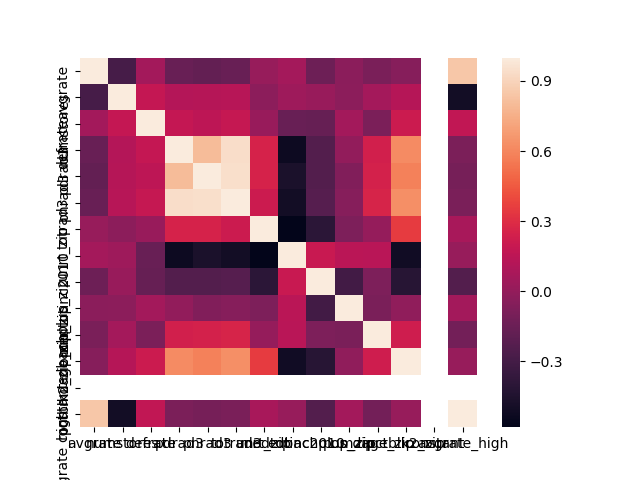

In [187]:
%matplotlib notebook
# See correlation between predictors:
sb.heatmap(df.corr())

In [188]:
df.drop(["totrad3"], axis=1, inplace=True) # Drop due to multicollinearity

,avgrate,numstores,defrate,pdrad3,pnrad3,unrt_zip,medtotinc2010,edbachplus_zip,pop_zip,mdage_zip,pctblk2_zip,constant,avgrate_high
0,521.429993,23,24.390244,7,3,5.7,38485.44531,40.2,44821,33.6,1.0,1,1
1,521.429993,23,38.596489,15,2,7.1,31289.11133,14.1,68295,29.2,2.2,1,1
2,521.429993,23,38.954868,6,3,7.1,31289.11133,14.1,68295,29.2,2.2,1,1
3,521.429993,23,27.352297,28,29,9.2,31421.22266,11.3,26524,28.5,1.4,1,1
4,521.429993,23,30.055660,22,17,7.5,27502.00000,22.3,28936,30.8,2.7,1,1


In [190]:
df.info() # Not enough observations, but we'll just go ahead

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 13 columns):
avgrate           147 non-null float64
numstores         147 non-null int64
defrate           147 non-null float64
pdrad3            147 non-null int64
pnrad3            147 non-null int64
unrt_zip          147 non-null float64
medtotinc2010     147 non-null float64
edbachplus_zip    147 non-null float64
pop_zip           147 non-null int64
mdage_zip         147 non-null float64
pctblk2_zip       147 non-null float64
constant          147 non-null int64
avgrate_high      147 non-null int64
dtypes: float64(7), int64(6)
memory usage: 15.0 KB


In [222]:
X = df.ix[:, (11, 1, 2, 5, 6, 7, 8 , 9, 10)].values 
y = df.ix[:, 12].values

In [223]:
LogitModel = sm.Logit(y, X)
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.324112
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  147
Model:                          Logit   Df Residuals:                      138
Method:                           MLE   Df Model:                            8
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:                  0.4095
Time:                        13:07:13   Log-Likelihood:                -47.644
converged:                       True   LL-Null:                       -80.685
                                        LLR p-value:                 2.950e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2300      4.933      1.668      0.095      -1.439      17.899
x1            -0.2449      0.045     -5.415      0.000      -0.334      -0.156
x2             0.0926      0.036      2.605      0.009       0.023       0.162
x3             0.1181      0.185      0.638      0.523      -0.245       0.481
x4          9.697e-05   6.21e-05      1.561      0.118   -2.48e-05       0.000
x5            -0.0641      0.038     -1.702      0.089      -0.138       0.010
x6         -1.274e-05   2.29e-05     -0.555      0.579   -5.77e-05    3.22e-05
x7            -0.1863      0.120     -1.551      0.121      -0.422       0.049
x8             0.0651      0.296      0.220      0.826      -0.514       0.644
==============================================================================
"""

2C). Variables with significant coefficents are numstores, defrate at level 0.05 (-0.2449 and 0.0926 for coefficients respectively).